In [20]:
import pandas as pd
import numpy as np
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv('givingSG_campaign_details.csv')
df.head()

,CampaignId,CampaignTitle,CharityName,AboutCampaign,AboutCharity
0,3701156,365 is the code you need to GIFT help,Children-At-Risk Empowerment Association (CARE...,What struggles lie behind the face? CARE Sing...,"Established in 1997, Children-At-Risk Empowerm..."
1,3749727,You can HELP,Children-At-Risk Empowerment Association (CARE...,You alone have the power to decide what your d...,"Established in 1997, Children-At-Risk Empowerm..."
2,3749688,LKH's Inaugural Virtual Fundraising Flag Day,Ling Kwang Home for Senior Citizens,I am Edwin and have been totally blind since b...,Ling Kwang Home for Senior Citizens (LKHSC) is...
3,3749675,Help families...,Children-At-Risk Empowerment Association (CARE...,$365 or $1 a day can allow support for student...,"Established in 1997, Children-At-Risk Empowerm..."
4,2405227,Help use music to heal..,Children-At-Risk Empowerment Association (CARE...,Supporting samba masala... Samba Masala is co...,"Established in 1997, Children-At-Risk Empowerm..."


In [22]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string


# Download necessary resources for NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to clean the 'AboutCampaign' text
def clean_description(text):
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    
    # Remove punctuation and stopwords, then apply lemmatization
    cleaned_tokens = [
        lemmatizer.lemmatize(word.lower()) for word in tokens 
        if word.lower() not in stop_words and word not in string.punctuation
    ]
    
    # Join tokens back to a single cleaned string
    cleaned_text = ' '.join(cleaned_tokens)
    return cleaned_text

# Apply the cleaning function to the 'AboutCampaign' column
df['Cleaned_AboutCampaign'] = df['AboutCampaign'].apply(clean_description)

# Select the required columns for the output file
cleaned_df = df[['CharityName', 'CampaignTitle', 'Cleaned_AboutCampaign']]

# Save the cleaned data to a new CSV file
output_path = 'cleaned_givingSG_campaign_details.csv'  
cleaned_df.to_csv(output_path, index=False)

print("File saved at:", output_path)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Regin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Regin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Regin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


File saved at: cleaned_givingSG_campaign_details.csv


In [23]:
df1 = pd.read_csv('cleaned_givingSG_campaign_details.csv')
df1.head()

,CharityName,CampaignTitle,Cleaned_AboutCampaign
0,Children-At-Risk Empowerment Association (CARE...,365 is the code you need to GIFT help,struggle lie behind face care singapore work m...
1,Children-At-Risk Empowerment Association (CARE...,You can HELP,alone power decide donation help many people h...
2,Ling Kwang Home for Senior Citizens,LKH's Inaugural Virtual Fundraising Flag Day,edwin totally blind since birth thankful god m...
3,Children-At-Risk Empowerment Association (CARE...,Help families...,365 1 day allow support student need donate 10...
4,Children-At-Risk Empowerment Association (CARE...,Help use music to heal..,supporting samba masala ... samba masala colla...


In [7]:
#TF-IDF (Term Frequency-Inverse Document Frequency) to extract keywords

from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_df=0.8, max_features=1000, stop_words='english', use_idf=True)

# Fit and transform the 'Cleaned_AboutCampaign' column
tfidf_matrix = tfidf.fit_transform(df['Cleaned_AboutCampaign'])

# Extract feature names (i.e., words)
feature_names = tfidf.get_feature_names_out()

# Convert TF-IDF matrix to a DataFrame for better readability
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Display top keywords for each campaign description
top_n = 5  # Number of top keywords to extract for each campaign

def get_top_keywords(row, features, n=top_n):
    # Get top n indices for TF-IDF values
    indices = row.argsort()[-n:][::-1]
    # Get feature names for the top indices
    keywords = [features[i] for i in indices]
    return keywords

# Apply the function to each row in the TF-IDF matrix and add as a new column
df['Top_Keywords'] = tfidf_df.apply(lambda row: get_top_keywords(row, feature_names), axis=1)

# Display the DataFrame with the top keywords
display_columns = ['CharityName', 'CampaignTitle', 'Cleaned_AboutCampaign', 'Top_Keywords']
df[display_columns].head(10)  # Display the first 10 rows for a quick view

,CharityName,CampaignTitle,Cleaned_AboutCampaign,Top_Keywords
0,Children-At-Risk Empowerment Association (CARE...,365 is the code you need to GIFT help,struggle lie behind face care singapore work m...,"[issue, urgent, 18, suicide, helpline]"
1,Children-At-Risk Empowerment Association (CARE...,You can HELP,alone power decide donation help many people h...,"[help, child, working, power, step]"
2,Ling Kwang Home for Senior Citizens,LKH's Inaugural Virtual Fundraising Flag Day,edwin totally blind since birth thankful god m...,"[kwang, ling, cost, virtual, home]"
3,Children-At-Risk Empowerment Association (CARE...,Help families...,365 1 day allow support student need donate 10...,"[allow, love, donate, sure, need]"
4,Children-At-Risk Empowerment Association (CARE...,Help use music to heal..,supporting samba masala ... samba masala colla...,"[money, care, singapore, 2024, helping]"
5,Children-At-Risk Empowerment Association (CARE...,Old and forgotten?,u old would want forgotten ah start forgetting...,"[light, funding, help, ah, trained]"
6,Children-At-Risk Empowerment Association (CARE...,Help them please. Show love today,13 year old need big people like help u let 's...,"[old, help, better, like, world]"
7,Children-At-Risk Empowerment Association (CARE...,"OLD and useless? No, they are our loved ones",365 1 day help u deploy volunteer training hel...,"[donate, emotion, coping, helpline, currently]"
8,Children-At-Risk Empowerment Association (CARE...,R we alone?,feeling loneliness painful hurt feel hope work...,"[center, loneliness, feeling, feel, helping]"
9,Children-At-Risk Empowerment Association (CARE...,Help those in need,people hope suffer death give chance surviving...,"[death, chance, thriving, people, hope]"


In [12]:
#!pip install rake_nltk

In [17]:
#RAKE (Rapid Automatic Keyword Extraction) to extract key phrases

from rake_nltk import Rake

# Initialize RAKE with NLTK's stopwords for English
rake = Rake()

# Function to extract keywords using RAKE
def extract_keywords_rake(text):
    rake.extract_keywords_from_text(text)
    # Get the highest-ranked phrases as a list
    keywords = rake.get_ranked_phrases()
    return keywords[:5]  # Get top 5 phrases

# Apply RAKE to the 'Cleaned_AboutCampaign' column
df['Top_Keywords_RAKE'] = df['Cleaned_AboutCampaign'].apply(extract_keywords_rake)

# Display the DataFrame with the RAKE keywords
display_columns = ['CharityName', 'CampaignTitle', 'Cleaned_AboutCampaign', 'Top_Keywords_RAKE']
df[display_columns].head(10)  # Display the first 10 rows for a quick view

,CharityName,CampaignTitle,Cleaned_AboutCampaign,Top_Keywords_RAKE
0,Children-At-Risk Empowerment Association (CARE...,365 is the code you need to GIFT help,struggle lie behind face care singapore work m...,[struggle lie behind face care singapore work ...
1,Children-At-Risk Empowerment Association (CARE...,You can HELP,alone power decide donation help many people h...,[alone power decide donation help many people ...
2,Ling Kwang Home for Senior Citizens,LKH's Inaugural Virtual Fundraising Flag Day,edwin totally blind since birth thankful god m...,[loving attitude towards elderly care team run...
3,Children-At-Risk Empowerment Association (CARE...,Help families...,365 1 day allow support student need donate 10...,[365 1 day allow support student need donate 1...
4,Children-At-Risk Empowerment Association (CARE...,Help use music to heal..,supporting samba masala ... samba masala colla...,[supporting samba masala ... samba masala coll...
5,Children-At-Risk Empowerment Association (CARE...,Old and forgotten?,u old would want forgotten ah start forgetting...,[2024 help emotionally affected get timely hel...
6,Children-At-Risk Empowerment Association (CARE...,Help them please. Show love today,13 year old need big people like help u let 's...,[help child get back normal life like penguin ...
7,Children-At-Risk Empowerment Association (CARE...,"OLD and useless? No, they are our loved ones",365 1 day help u deploy volunteer training hel...,[365 1 day help u deploy volunteer training he...
8,Children-At-Risk Empowerment Association (CARE...,R we alone?,feeling loneliness painful hurt feel hope work...,[feeling loneliness painful hurt feel hope wor...
9,Children-At-Risk Empowerment Association (CARE...,Help those in need,people hope suffer death give chance surviving...,[people hope suffer death give chance survivin...


In [15]:
#YAKE (Yet Another Keyword Extractor) for extracting keywords & keyphrases
import yake

# Initialize YAKE with specific parameters
language = "en"
max_ngram_size = 3  # Limit n-grams up to 3 words
deduplication_threshold = 0.9  # Control phrase overlap (0 to 1)
num_keywords = 5  # Number of keywords to extract per description

yake_extractor = yake.KeywordExtractor(
    lan=language, 
    n=max_ngram_size, 
    dedupLim=deduplication_threshold, 
    top=num_keywords, 
    features=None
)

# Function to extract keywords using YAKE
def extract_keywords_yake(text):
    keywords = yake_extractor.extract_keywords(text)
    # Extract only the keyword phrases
    top_keywords = [keyword for keyword, score in keywords]
    return top_keywords

# Apply YAKE to the 'Cleaned_AboutCampaign' column
df['Top_Keywords_YAKE'] = df['Cleaned_AboutCampaign'].apply(extract_keywords_yake)

# Display the DataFrame with YAKE keywords
display_columns = ['CharityName', 'CampaignTitle', 'Cleaned_AboutCampaign', 'Top_Keywords_YAKE']
df[display_columns].head(10)  # Display the first 10 rows for a quick view

,CharityName,CampaignTitle,Cleaned_AboutCampaign,Top_Keywords_YAKE
0,Children-At-Risk Empowerment Association (CARE...,365 is the code you need to GIFT help,struggle lie behind face care singapore work m...,"[issue suicide case, struggling mental health,..."
1,Children-At-Risk Empowerment Association (CARE...,You can HELP,alone power decide donation help many people h...,"[singapore working support, power decide donat..."
2,Ling Kwang Home for Senior Citizens,LKH's Inaugural Virtual Fundraising Flag Day,edwin totally blind since birth thankful god m...,"[ling kwang home, virtual flag day, inaugural ..."
3,Children-At-Risk Empowerment Association (CARE...,Help families...,365 1 day allow support student need donate 10...,"[counselling session donate, continue providin..."
4,Children-At-Risk Empowerment Association (CARE...,Help use music to heal..,supporting samba masala ... samba masala colla...,"[supporting samba masala, supporting samba, sa..."
5,Children-At-Risk Empowerment Association (CARE...,Old and forgotten?,u old would want forgotten ah start forgetting...,"[thing lucky rem, start forgetting thing, forg..."
6,Children-At-Risk Empowerment Association (CARE...,Help them please. Show love today,13 year old need big people like help u let 's...,"[world dear adult, back normal life, child gro..."
7,Children-At-Risk Empowerment Association (CARE...,"OLD and useless? No, they are our loved ones",365 1 day help u deploy volunteer training hel...,"[training helping donate, counselling session ..."
8,Children-At-Risk Empowerment Association (CARE...,R we alone?,feeling loneliness painful hurt feel hope work...,"[feeling loneliness painful, needing comfortin..."
9,Children-At-Risk Empowerment Association (CARE...,Help those in need,people hope suffer death give chance surviving...,"[people hope suffer, chance surviving thriving..."


In [21]:
#!pip3 install gensim nltk

In [20]:
#Topic Modelling: Latent Dirichlet Allocation (LDA)
#Show primary topic for each campaign description

import gensim
from gensim import corpora
from nltk.tokenize import word_tokenize
import nltk


# Download NLTK tokenizer if not already installed
nltk.download('punkt')

# Tokenize and prepare text data for LDA
def preprocess_for_lda(text):
    # Tokenize text
    tokens = word_tokenize(text.lower())
    # Filter out tokens that are too short or non-alphabetic
    tokens = [token for token in tokens if token.isalpha() and len(token) > 2]
    return tokens

# Apply tokenization to each campaign description
df['Tokenized_AboutCampaign'] = df['Cleaned_AboutCampaign'].apply(preprocess_for_lda)

# Create a dictionary and a corpus for LDA
dictionary = corpora.Dictionary(df['Tokenized_AboutCampaign'])
corpus = [dictionary.doc2bow(text) for text in df['Tokenized_AboutCampaign']]

# Define the number of topics
num_topics = 5  # Adjust the number of topics as needed

# Build the LDA model
lda_model = gensim.models.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=num_topics,
    random_state=42,
    update_every=1,
    chunksize=10,
    passes=10,
    alpha='auto'
)

# Display the top words in each topic
for idx, topic in lda_model.print_topics(num_topics=num_topics, num_words=5):
    print(f"Topic {idx + 1}: {topic}")

# Assign a dominant topic for each campaign description
def get_dominant_topic(bow):
    topic_probs = lda_model.get_document_topics(bow)
    dominant_topic = max(topic_probs, key=lambda x: x[1])[0]  # Get topic with highest probability
    return dominant_topic

# Add dominant topic to the DataFrame
df['Dominant_Topic'] = [get_dominant_topic(bow) for bow in corpus]

# Display the DataFrame with the dominant topics for each campaign
display_columns = ['CharityName', 'CampaignTitle', 'Cleaned_AboutCampaign', 'Dominant_Topic']
df[display_columns].head(10)  # Display the first 10 rows for a quick view

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Regin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Topic 1: 0.029*"support" + 0.028*"life" + 0.022*"community" + 0.016*"child" + 0.016*"individual"
Topic 2: 0.016*"beneficiary" + 0.012*"disability" + 0.012*"assistance" + 0.011*"part" + 0.011*"cause"
Topic 3: 0.014*"singapore" + 0.012*"health" + 0.010*"new" + 0.010*"training" + 0.010*"financial"
Topic 4: 0.033*"young" + 0.032*"inclusion" + 0.031*"small" + 0.027*"woman" + 0.026*"generation"
Topic 5: 0.024*"care" + 0.022*"cancer" + 0.017*"fund" + 0.017*"senior" + 0.016*"patient"


,CharityName,CampaignTitle,Cleaned_AboutCampaign,Dominant_Topic
0,Children-At-Risk Empowerment Association (CARE...,365 is the code you need to GIFT help,struggle lie behind face care singapore work m...,2
1,Children-At-Risk Empowerment Association (CARE...,You can HELP,alone power decide donation help many people h...,0
2,Ling Kwang Home for Senior Citizens,LKH's Inaugural Virtual Fundraising Flag Day,edwin totally blind since birth thankful god m...,4
3,Children-At-Risk Empowerment Association (CARE...,Help families...,365 1 day allow support student need donate 10...,0
4,Children-At-Risk Empowerment Association (CARE...,Help use music to heal..,supporting samba masala ... samba masala colla...,4
5,Children-At-Risk Empowerment Association (CARE...,Old and forgotten?,u old would want forgotten ah start forgetting...,4
6,Children-At-Risk Empowerment Association (CARE...,Help them please. Show love today,13 year old need big people like help u let 's...,0
7,Children-At-Risk Empowerment Association (CARE...,"OLD and useless? No, they are our loved ones",365 1 day help u deploy volunteer training hel...,0
8,Children-At-Risk Empowerment Association (CARE...,R we alone?,feeling loneliness painful hurt feel hope work...,2
9,Children-At-Risk Empowerment Association (CARE...,Help those in need,people hope suffer death give chance surviving...,0


In [23]:
#!pip install vaderSentiment

In [24]:
# Sentiment Analysis: VADER (Valence Aware Dictionary and sEntiment Reasoner)
# Provides sentiment scores and corresponding labels for each campaign description

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_scores(text):
    scores = analyzer.polarity_scores(text)
    return scores['compound']  # Compound score gives overall sentiment

# Apply VADER to get sentiment scores for each campaign description
df['Sentiment_Score'] = df['Cleaned_AboutCampaign'].apply(get_sentiment_scores)

# Define sentiment labels based on the compound score
def sentiment_label(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment labels to the compound scores
df['Sentiment_Label'] = df['Sentiment_Score'].apply(sentiment_label)

# Display the DataFrame with sentiment scores and labels
display_columns = ['CharityName', 'CampaignTitle', 'Cleaned_AboutCampaign', 'Sentiment_Score', 'Sentiment_Label']
df[display_columns].head(10)  # Display the first 10 rows for a quick view

,CharityName,CampaignTitle,Cleaned_AboutCampaign,Sentiment_Score,Sentiment_Label
0,Children-At-Risk Empowerment Association (CARE...,365 is the code you need to GIFT help,struggle lie behind face care singapore work m...,0.7579,Positive
1,Children-At-Risk Empowerment Association (CARE...,You can HELP,alone power decide donation help many people h...,0.9001,Positive
2,Ling Kwang Home for Senior Citizens,LKH's Inaugural Virtual Fundraising Flag Day,edwin totally blind since birth thankful god m...,0.9966,Positive
3,Children-At-Risk Empowerment Association (CARE...,Help families...,365 1 day allow support student need donate 10...,0.9657,Positive
4,Children-At-Risk Empowerment Association (CARE...,Help use music to heal..,supporting samba masala ... samba masala colla...,0.9908,Positive
5,Children-At-Risk Empowerment Association (CARE...,Old and forgotten?,u old would want forgotten ah start forgetting...,0.9821,Positive
6,Children-At-Risk Empowerment Association (CARE...,Help them please. Show love today,13 year old need big people like help u let 's...,0.9690,Positive
7,Children-At-Risk Empowerment Association (CARE...,"OLD and useless? No, they are our loved ones",365 1 day help u deploy volunteer training hel...,0.9612,Positive
8,Children-At-Risk Empowerment Association (CARE...,R we alone?,feeling loneliness painful hurt feel hope work...,-0.0258,Neutral
9,Children-At-Risk Empowerment Association (CARE...,Help those in need,people hope suffer death give chance surviving...,-0.3182,Negative


In [26]:
#!pip3 install transformers

In [27]:
#Sentiment Analysis: BERT-based model
#Provide sentiment labels & confidence scores for each campaign description based on the BERT model’s analysis
from transformers import pipeline


# Initialize the sentiment analysis pipeline with a pre-trained BERT model
sentiment_analyzer = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# Function to get sentiment scores using BERT
def get_sentiment_bert(text):
    result = sentiment_analyzer(text)[0]  # Get the first result from the list
    return result['label'], result['score']  # Return label and confidence score

# Apply BERT to get sentiment labels and scores for each campaign description
df[['Sentiment_Label_BERT', 'Sentiment_Score_BERT']] = df['Cleaned_AboutCampaign'].apply(
    lambda x: pd.Series(get_sentiment_bert(x))
)

# Display the DataFrame with BERT sentiment labels and scores
display_columns = ['CharityName', 'CampaignTitle', 'Cleaned_AboutCampaign', 'Sentiment_Label_BERT', 'Sentiment_Score_BERT']
df[display_columns].head(10)  # Display the first 10 rows for a quick view

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

C:\Users\Regin\AppData\Roaming\Python\Python310\site-packages\huggingface_hub\file_download.py:147: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Regin\.cache\huggingface\hub\models--nlptown--bert-base-multilingual-uncased-sentiment. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

,CharityName,CampaignTitle,Cleaned_AboutCampaign,Sentiment_Label_BERT,Sentiment_Score_BERT
0,Children-At-Risk Empowerment Association (CARE...,365 is the code you need to GIFT help,struggle lie behind face care singapore work m...,1 star,0.240511
1,Children-At-Risk Empowerment Association (CARE...,You can HELP,alone power decide donation help many people h...,5 stars,0.498272
2,Ling Kwang Home for Senior Citizens,LKH's Inaugural Virtual Fundraising Flag Day,edwin totally blind since birth thankful god m...,5 stars,0.531076
3,Children-At-Risk Empowerment Association (CARE...,Help families...,365 1 day allow support student need donate 10...,5 stars,0.332941
4,Children-At-Risk Empowerment Association (CARE...,Help use music to heal..,supporting samba masala ... samba masala colla...,1 star,0.313138
5,Children-At-Risk Empowerment Association (CARE...,Old and forgotten?,u old would want forgotten ah start forgetting...,1 star,0.526581
6,Children-At-Risk Empowerment Association (CARE...,Help them please. Show love today,13 year old need big people like help u let 's...,3 stars,0.259830
7,Children-At-Risk Empowerment Association (CARE...,"OLD and useless? No, they are our loved ones",365 1 day help u deploy volunteer training hel...,5 stars,0.484671
8,Children-At-Risk Empowerment Association (CARE...,R we alone?,feeling loneliness painful hurt feel hope work...,1 star,0.273620
9,Children-At-Risk Empowerment Association (CARE...,Help those in need,people hope suffer death give chance surviving...,1 star,0.472394


In [2]:
#!pip install pytrends

In [6]:
import time

def fetch_trends(keyword):
    try:
        # Build the payload with the keyword
        pytrends.build_payload([keyword], cat=0, timeframe='today 12-m', geo='SG', gprop='')
        # Fetch interest over time
        trends_data = pytrends.interest_over_time()
        if not trends_data.empty:
            # Return the average trend score
            return trends_data[keyword].mean()
        else:
            return 0  # Return 0 if no data is found
    except Exception as e:
        print(f"Error fetching trends for {keyword}: {e}")
        return 0
    finally:
        time.sleep(5)  # Delay of 5 seconds between requests
        
# Display the trend scores
trend_scores

{'education': 84.9245283018868,
 'relief': 55.056603773584904,
 'community support': 0}

In [7]:
def fetch_trends_batch(keywords):
    try:
        # Build the payload with multiple keywords
        pytrends.build_payload(keywords, cat=0, timeframe='today 12-m', geo='SG', gprop='')
        # Fetch interest over time
        trends_data = pytrends.interest_over_time()
        if not trends_data.empty:
            # Return the average trend scores for all keywords
            return {kw: trends_data[kw].mean() if kw in trends_data else 0 for kw in keywords}
        else:
            return {kw: 0 for kw in keywords}
    except Exception as e:
        print(f"Error fetching trends for {keywords}: {e}")
        return {kw: 0 for kw in keywords}

# Display the trend scores
trend_scores

{'education': 84.9245283018868,
 'relief': 55.056603773584904,
 'community support': 0}

In [ ]:
#Integrate the trend scores into your analysis pipeline, combining Google Trends relevance with the previously extracted keywords.
from pytrends.request import TrendReq
import time

# Initialize pytrends
pytrends = TrendReq(hl='en-US', tz=360)

# Load the DataFrame with extracted keywords (assume keywords from YAKE)
file_path = 'cleaned_givingSG_campaign_details.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Sample extracted keywords column (replace with actual keyword column from TF-IDF, RAKE, or YAKE)
df['Extracted_Keywords'] = [['education', 'relief', 'community support'], 
                             ['disaster aid', 'food drive', 'children health'], 
                             ['mental health', 'charity event', 'youth program']]  # Example keywords

# Function to fetch Google Trends scores for a list of keywords
def fetch_trends_batch(keywords):
    try:
        pytrends.build_payload(keywords, cat=0, timeframe='today 12-m', geo='SG', gprop='')
        trends_data = pytrends.interest_over_time()
        if not trends_data.empty:
            # Calculate the average score for each keyword
            return {kw: trends_data[kw].mean() if kw in trends_data else 0 for kw in keywords}
        else:
            return {kw: 0 for kw in keywords}
    except Exception as e:
        print(f"Error fetching trends for {keywords}: {e}")
        return {kw: 0 for kw in keywords}

# Function to integrate trend scores for a campaign
def integrate_trends(keywords):
    trend_scores = fetch_trends_batch(keywords)
    # Delay to avoid rate-limiting
    time.sleep(5)
    return trend_scores

# Apply the trend integration for each campaign
df['Keyword_Trends'] = df['Extracted_Keywords'].apply(integrate_trends)

# Expand the trend scores into separate columns for better analysis
df_trends = df['Keyword_Trends'].apply(pd.Series)
df_trends.columns = [f'Trend_{i+1}' for i in range(len(df_trends.columns))]

# Combine trend scores back with the original DataFrame
df_combined = pd.concat([df, df_trends], axis=1)

# Simulate extracted keywords using the first 3 words from 'Cleaned_AboutCampaign'
df['Extracted_Keywords'] = df['Cleaned_AboutCampaign'].apply(
    lambda x: x.split()[:3] if isinstance(x, str) else []
)


Error fetching trends for ['struggle', 'lie', 'behind']: The request failed: Google returned a response with code 429
Error fetching trends for ['alone', 'power', 'decide']: The request failed: Google returned a response with code 429
Error fetching trends for ['edwin', 'totally', 'blind']: The request failed: Google returned a response with code 429
Error fetching trends for ['365', '1', 'day']: The request failed: Google returned a response with code 429
Error fetching trends for ['supporting', 'samba', 'masala']: The request failed: Google returned a response with code 429
Error fetching trends for ['u', 'old', 'would']: The request failed: Google returned a response with code 429
Error fetching trends for ['13', 'year', 'old']: The request failed: Google returned a response with code 429
Error fetching trends for ['365', '1', 'day']: The request failed: Google returned a response with code 429
Error fetching trends for ['feeling', 'loneliness', 'painful']: The request failed: Googl

Error fetching trends for ['journey', 'living', 'disability']: The request failed: Google returned a response with code 429
Error fetching trends for ['danxability', "'re", 'dancersize']: The request failed: Google returned a response with code 429
Error fetching trends for ['danxability', "'re", 'dancersize']: The request failed: Google returned a response with code 429
Error fetching trends for ['journey', 'living', 'disability']: The request failed: Google returned a response with code 429
Error fetching trends for ['hey', 'amazing', 'friend']: The request failed: Google returned a response with code 429
Error fetching trends for ['danxability', "'re", 'dancersize']: The request failed: Google returned a response with code 429
Error fetching trends for ['welcome', 'heart', 'compassion']: The request failed: Google returned a response with code 429
Error fetching trends for ['spirit', 'compassion', 'positive']: The request failed: Google returned a response with code 429
Error fetchi

Error fetching trends for ['beyond', 'full', 'belly']: The request failed: Google returned a response with code 429
Error fetching trends for ['rising', 'cost', 'living']: The request failed: Google returned a response with code 429
Error fetching trends for ['singapore', '’', 'population']: The request failed: Google returned a response with code 429
Error fetching trends for ['cheng', 'hong', 'welfare']: The request failed: Google returned a response with code 429
Error fetching trends for ['singapore', '’', 'population']: The request failed: Google returned a response with code 429
Error fetching trends for ['beyond', 'full', 'belly']: The request failed: Google returned a response with code 429
Error fetching trends for ['elderly', 'individual', 'accessing']: The request failed: Google returned a response with code 429
Error fetching trends for ['singapore', '’', 'population']: The request failed: Google returned a response with code 429
Error fetching trends for ['afterlife', 'mem

Error fetching trends for ["o'joy", 'dedicated', 'helping']: The request failed: Google returned a response with code 429
Error fetching trends for ['social', 'isolation', 'one']: The request failed: Google returned a response with code 429
Error fetching trends for ['mid', 'may', 'love']: The request failed: Google returned a response with code 429
Error fetching trends for ['14', 'may', '24']: The request failed: Google returned a response with code 429
Error fetching trends for ['care', 'basic', 'emotion']: The request failed: Google returned a response with code 429
Error fetching trends for ['donate', '50', 'help']: The request failed: Google returned a response with code 429
Error fetching trends for ['reality', 'stark', 'society']: The request failed: Google returned a response with code 429
Error fetching trends for ['feast', 'shall', 'help']: The request failed: Google returned a response with code 429
Error fetching trends for ['today', 'invite', 'contribute']: The request fa

Error fetching trends for ['mdm', 'ang', 'vibrant']: The request failed: Google returned a response with code 429
Error fetching trends for ["'m", 'participating', 'standard']: The request failed: Google returned a response with code 429
Error fetching trends for ['’', 'participating', 'standard']: The request failed: Google returned a response with code 429
Error fetching trends for ['’', 'participating', 'standard']: The request failed: Google returned a response with code 429
Error fetching trends for ["'m", 'participating', 'standard']: The request failed: Google returned a response with code 429
Error fetching trends for ['many', 'family', 'singapore']: The request failed: Google returned a response with code 429
Error fetching trends for ['make', 'donation', '99']: The request failed: Google returned a response with code 429
Error fetching trends for ['matter', 'always', 'help']: The request failed: Google returned a response with code 429
Error fetching trends for ['help', 'lion

Error fetching trends for ['’', 'participating', 'standard']: The request failed: Google returned a response with code 429
Error fetching trends for ['elaine', 'running', '21.1km']: The request failed: Google returned a response with code 429
Error fetching trends for ['🎄✨', 'need', 'help']: The request failed: Google returned a response with code 429
Error fetching trends for ['uncle', 'patrick', 'real']: The request failed: Google returned a response with code 429
Error fetching trends for ['grandparent', 'given', 'u']: The request failed: Google returned a response with code 429
Error fetching trends for ['beauty', 'nature', 'surround']: The request failed: Google returned a response with code 429
Error fetching trends for ['future', 'hand', 'today']: The request failed: Google returned a response with code 429
Error fetching trends for ['hi', 'friend', "'m"]: The request failed: Google returned a response with code 429
Error fetching trends for ['aloha', '’', 'hawaiian']: The reque

In [24]:
from pytrends.request import TrendReq
import pandas as pd
import time
from random import choice

# Define a list of proxies
proxies_list = [
    {'http': 'http://proxy1:port1', 'https': 'https://proxy1:port1'},
    {'http': 'http://proxy2:port2', 'https': 'https://proxy2:port2'}
]

# User agents for rotation
user_agents = [
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
]

# Rotate user agent
def rotate_user_agent():
    return choice(user_agents)

# Rotate proxy
def rotate_proxy():
    return choice(proxies_list)

# Initialize pytrends with a random proxy
pytrends = TrendReq(hl='en-US', tz=360, proxies=rotate_proxy(), requests_args={'headers': {'User-Agent': rotate_user_agent()}})

# Fetch trends
def fetch_trends_single(keyword):
    try:
        pytrends.build_payload([keyword], cat=0, timeframe='today 12-m', geo='SG', gprop='')
        trends_data = pytrends.interest_over_time()
        if not trends_data.empty:
            return trends_data[keyword].mean()
        else:
            return 0
    except Exception as e:
        print(f"Error fetching trends for {keyword}: {e}")
        return 0

# Integrate trends for keywords
def integrate_trends(keywords):
    trend_scores = {}
    for keyword in keywords:
        trend_scores[keyword] = fetch_trends_single(keyword)
        time.sleep(30)  # Increase delay to avoid rate-limiting
    return trend_scores

# Example dataset
df = pd.DataFrame({'Keywords': [['education', 'relief', 'support'], ['donate', 'help', 'charity']]})

# Apply trends
df['Keyword_Trends'] = df['Keywords'].apply(integrate_trends)

# Display results
print(df)


KeyError: 0

In [26]:
from pytrends.request import TrendReq

pytrends = TrendReq(hl='en-US', tz=360)

try:
    pytrends.build_payload(['education'], cat=0, timeframe='today 12-m', geo='SG', gprop='')
    trends_data = pytrends.interest_over_time()
    print(trends_data)
except Exception as e:
    print(f"Error: {e}")


            education  isPartial
date                            
2023-11-12         73      False
2023-11-19         81      False
2023-11-26         67      False
2023-12-03         73      False
2023-12-10         69      False
2023-12-17         61      False
2023-12-24         62      False
2023-12-31         80      False
2024-01-07         84      False
2024-01-14         91      False
2024-01-21         95      False
2024-01-28         87      False
2024-02-04         85      False
2024-02-11         86      False
2024-02-18         89      False
2024-02-25         95      False
2024-03-03         92      False
2024-03-10         82      False
2024-03-17         96      False
2024-03-24         84      False
2024-03-31         85      False
2024-04-07         82      False
2024-04-14         94      False
2024-04-21         85      False
2024-04-28         92      False
2024-05-05         89      False
2024-05-12        100      False
2024-05-19         79      False
2024-05-26

In [27]:
from pytrends.request import TrendReq
import pandas as pd
import time

# Initialize Pytrends without proxies
pytrends = TrendReq(hl='en-US', tz=360)

# Function to fetch Google Trends data for a single keyword
def fetch_trends_single(keyword):
    try:
        pytrends.build_payload([keyword], cat=0, timeframe='today 12-m', geo='SG', gprop='')
        trends_data = pytrends.interest_over_time()
        if not trends_data.empty:
            return trends_data[keyword].mean()
        else:
            return 0
    except Exception as e:
        print(f"Error fetching trends for {keyword}: {e}")
        return 0

# Function to fetch trends for a list of keywords
def integrate_trends(keywords):
    trend_scores = {}
    for keyword in keywords:
        trend_scores[keyword] = fetch_trends_single(keyword)
        time.sleep(5)  # Add delay to avoid rate-limiting
    return trend_scores

# Example DataFrame
df = pd.DataFrame({'Extracted_Keywords': [['education', 'relief', 'support'], ['donate', 'help', 'charity']]})

# Apply trends integration
df['Keyword_Trends'] = df['Extracted_Keywords'].apply(integrate_trends)

# Expand trend scores into separate columns
df_trends = df['Keyword_Trends'].apply(pd.Series)
df_trends.columns = [f'Trend_{i+1}' for i in range(len(df_trends.columns))]

# Combine trend scores back with the original DataFrame
df_combined = pd.concat([df, df_trends], axis=1)

# Display results
print(df_combined)


Error fetching trends for relief: The request failed: Google returned a response with code 429
Error fetching trends for support: The request failed: Google returned a response with code 429
Error fetching trends for donate: The request failed: Google returned a response with code 429
Error fetching trends for help: The request failed: Google returned a response with code 429
Error fetching trends for charity: The request failed: Google returned a response with code 429
             Extracted_Keywords  \
0  [education, relief, support]   
1       [donate, help, charity]   

                                      Keyword_Trends   Trend_1  Trend_2  \
0  {'education': 84.54716981132076, 'relief': 0, ...  84.54717      0.0   
1             {'donate': 0, 'help': 0, 'charity': 0}       NaN      NaN   

   Trend_3  Trend_4  Trend_5  Trend_6  
0      0.0      NaN      NaN      NaN  
1      NaN      0.0      0.0      0.0  


In [28]:
from pytrends.request import TrendReq
import pandas as pd
import time
import json

# Initialize Pytrends
pytrends = TrendReq(hl='en-US', tz=360)

# Load cached results
try:
    with open('cached_trends.json', 'r') as f:
        cached_trends = json.load(f)
except FileNotFoundError:
    cached_trends = {}

# Save results to cache
def save_to_cache(keyword, score):
    cached_trends[keyword] = score
    with open('cached_trends.json', 'w') as f:
        json.dump(cached_trends, f)

# Fetch trends with retries and caching
def fetch_trends_with_cache(keyword, retries=3, delay=60):
    if keyword in cached_trends:
        return cached_trends[keyword]
    for attempt in range(retries):
        try:
            pytrends.build_payload([keyword], cat=0, timeframe='today 12-m', geo='SG', gprop='')
            trends_data = pytrends.interest_over_time()
            if not trends_data.empty:
                score = trends_data[keyword].mean()
                save_to_cache(keyword, score)
                return score
        except Exception as e:
            print(f"Attempt {attempt + 1} failed for {keyword}: {e}")
            time.sleep(delay)
    return 0  # Return 0 if all retries fail

# Integrate trends for a list of keywords
def integrate_trends(keywords):
    trend_scores = {}
    for keyword in keywords:
        trend_scores[keyword] = fetch_trends_with_cache(keyword)
        time.sleep(60)  # Delay between keywords
    return trend_scores

# Example DataFrame
df = pd.DataFrame({'Extracted_Keywords': [['education', 'relief', 'support'], ['donate', 'help', 'charity']]})

# Apply trends integration
df['Keyword_Trends'] = df['Extracted_Keywords'].apply(integrate_trends)

# Expand trend scores into separate columns
df_trends = df['Keyword_Trends'].apply(pd.Series)
df_trends.columns = [f'Trend_{i+1}' for i in range(len(df_trends.columns))]

# Combine trend scores back with the original DataFrame
df_combined = pd.concat([df, df_trends], axis=1)

# Save results
df_combined.to_csv('google_trends_results.csv', index=False)
print("Results saved to google_trends_results.csv")

Attempt 1 failed for relief: The request failed: Google returned a response with code 429
Attempt 1 failed for support: The request failed: Google returned a response with code 429
Attempt 2 failed for support: The request failed: Google returned a response with code 429
Attempt 3 failed for support: The request failed: Google returned a response with code 429
Results saved to google_trends_results.csv


In [4]:
import pandas as pd
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk

# Download necessary NLTK tokenizer
nltk.download('punkt')

# Load the preprocessed data
file_path = 'cleaned_givingSG_campaign_details.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Step 1: Tokenize Text Data
def tokenize_text(text):
    return word_tokenize(text.lower())

df['Tokenized_Text'] = df['Cleaned_AboutCampaign'].apply(tokenize_text)

# Step 2: Train Word2Vec Model
# Prepare sentences for Word2Vec (list of lists of tokens)
sentences = df['Tokenized_Text'].tolist()

# Train the Word2Vec model
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=2, workers=4, sg=0)

# Step 3: Function to Find Synonyms & Related Words
def find_related_words(word, topn=5):
    try:
        return word2vec_model.wv.most_similar(word, topn=topn)
    except KeyError:
        return f"Word '{word}' not in vocabulary."

# Example: Find related words for a specific term
example_word = "education"
related_words = find_related_words(example_word)
print(f"Words related to '{example_word}': {related_words}")

# Step 4: Apply Related Words Identification for All Campaigns
# Add related words for the top keywords of each campaign
def get_related_words_for_keywords(keywords):
    related = {}
    for word in keywords:
        related[word] = find_related_words(word, topn=3)  # Get top 3 related words
    return related

# Apply the function to extracted keywords
df['Extracted_Keywords'] = df['Cleaned_AboutCampaign'].apply(lambda x: x.split()[:3])  # Placeholder for keywords
df['Related_Words'] = df['Extracted_Keywords'].apply(get_related_words_for_keywords)

# Display the results
display_columns = ['CharityName', 'CampaignTitle', 'Extracted_Keywords', 'Related_Words']
print(df[display_columns].head(10))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Regin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Words related to 'education': [('educational', 0.9674059748649597), ('much-needed', 0.9621139168739319), ('counseling', 0.9608410596847534), ('offer', 0.9585492014884949), ('holistic', 0.9553316235542297)]
                                         CharityName  \
0  Children-At-Risk Empowerment Association (CARE...   
1  Children-At-Risk Empowerment Association (CARE...   
2                Ling Kwang Home for Senior Citizens   
3  Children-At-Risk Empowerment Association (CARE...   
4  Children-At-Risk Empowerment Association (CARE...   
5  Children-At-Risk Empowerment Association (CARE...   
6  Children-At-Risk Empowerment Association (CARE...   
7  Children-At-Risk Empowerment Association (CARE...   
8  Children-At-Risk Empowerment Association (CARE...   
9  Children-At-Risk Empowerment Association (CARE...   

                                  CampaignTitle  \
0        365 is the code you need to GIFT help    
1                                  You can HELP   
2  LKH's Inaugural Virtu

In [5]:
import pandas as pd
from gensim.models import FastText
from nltk.tokenize import word_tokenize
import nltk

# Download necessary NLTK tokenizer
nltk.download('punkt')

# Load the preprocessed data
file_path = 'cleaned_givingSG_campaign_details.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Step 1: Tokenize Text Data
def tokenize_text(text):
    return word_tokenize(text.lower())

df['Tokenized_Text'] = df['Cleaned_AboutCampaign'].apply(tokenize_text)

# Step 2: Train FastText Model
# Prepare sentences for FastText (list of lists of tokens)
sentences = df['Tokenized_Text'].tolist()

# Train the FastText model
fasttext_model = FastText(sentences, vector_size=100, window=5, min_count=2, workers=4, sg=1)

# Step 3: Function to Find Synonyms & Related Words
def find_related_words_fasttext(word, topn=5):
    try:
        return fasttext_model.wv.most_similar(word, topn=topn)
    except KeyError:
        return f"Word '{word}' not in vocabulary."

# Example: Find related words for a specific term
example_word = "education"
related_words = find_related_words_fasttext(example_word)
print(f"Words related to '{example_word}': {related_words}")

# Step 4: Apply Related Words Identification for All Campaigns
# Add related words for the top keywords of each campaign
def get_related_words_for_keywords_fasttext(keywords):
    related = {}
    for word in keywords:
        related[word] = find_related_words_fasttext(word, topn=3)  # Get top 3 related words
    return related

# Apply the function to extracted keywords
df['Extracted_Keywords'] = df['Cleaned_AboutCampaign'].apply(lambda x: x.split()[:3])  # Placeholder for keywords
df['Related_Words_FastText'] = df['Extracted_Keywords'].apply(get_related_words_for_keywords_fasttext)

# Display the results
display_columns = ['CharityName', 'CampaignTitle', 'Extracted_Keywords', 'Related_Words_FastText']
print(df[display_columns].head(10))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Regin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Words related to 'education': [('innovation', 0.9247464537620544), ('variation', 0.9242077469825745), ('educational', 0.920472264289856), ('renovation', 0.9104558229446411), ('mitigation', 0.9089553952217102)]
                                         CharityName  \
0  Children-At-Risk Empowerment Association (CARE...   
1  Children-At-Risk Empowerment Association (CARE...   
2                Ling Kwang Home for Senior Citizens   
3  Children-At-Risk Empowerment Association (CARE...   
4  Children-At-Risk Empowerment Association (CARE...   
5  Children-At-Risk Empowerment Association (CARE...   
6  Children-At-Risk Empowerment Association (CARE...   
7  Children-At-Risk Empowerment Association (CARE...   
8  Children-At-Risk Empowerment Association (CARE...   
9  Children-At-Risk Empowerment Association (CARE...   

                                  CampaignTitle  \
0        365 is the code you need to GIFT help    
1                                  You can HELP   
2  LKH's Inaugural V

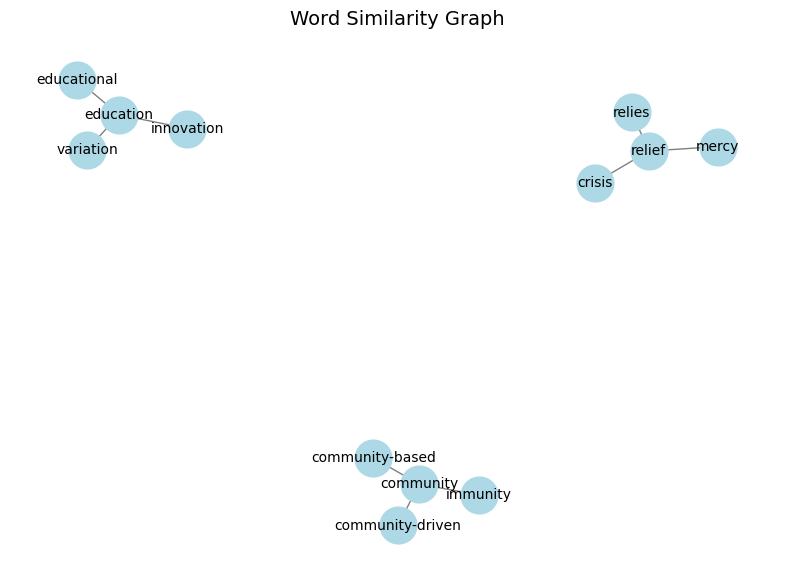

In [6]:
import matplotlib.pyplot as plt
import networkx as nx

# Function to create and visualize a word similarity graph
def plot_word_similarity_graph(related_words_dict):
    # Initialize a graph
    G = nx.Graph()
    
    # Add nodes and edges
    for word, related_words in related_words_dict.items():
        G.add_node(word)  # Add the main keyword
        for related_word, similarity in related_words:
            G.add_node(related_word)  # Add related word
            G.add_edge(word, related_word, weight=similarity)  # Add edge with similarity score
    
    # Draw the graph
    pos = nx.spring_layout(G, seed=42)  # Layout for consistent visualization
    plt.figure(figsize=(10, 7))
    
    # Draw nodes and edges
    nx.draw_networkx_nodes(G, pos, node_size=700, node_color='lightblue')
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
    nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')
    
    plt.title("Word Similarity Graph", fontsize=14)
    plt.axis("off")
    plt.show()

# Example: Extract related words for visualization
example_related_words = {
    "education": find_related_words_fasttext("education", topn=3),
    "relief": find_related_words_fasttext("relief", topn=3),
    "community": find_related_words_fasttext("community", topn=3),
}

# Plot the graph
plot_word_similarity_graph(example_related_words)


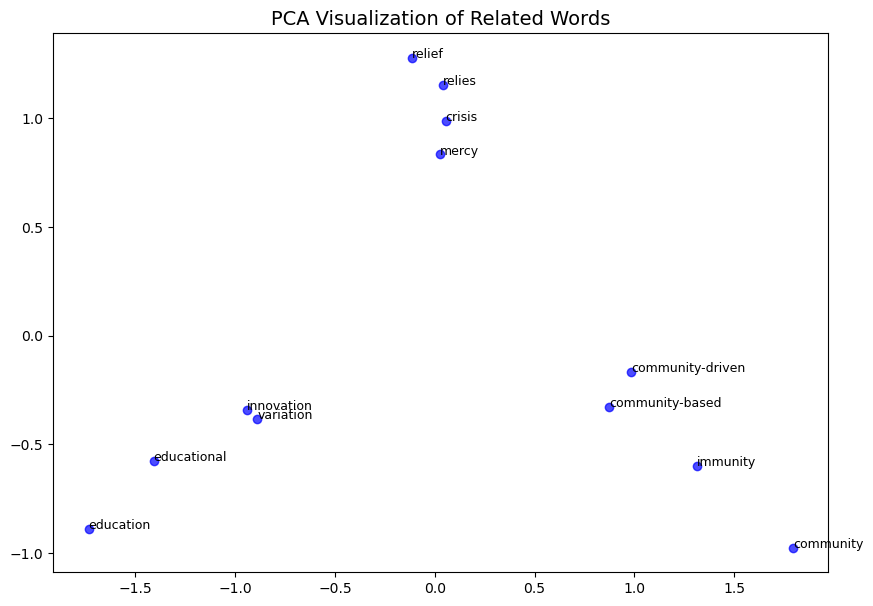

In [9]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce dimensions with PCA
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(vectors)

# Plot the PCA visualization
plt.figure(figsize=(10, 7))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], color='blue', alpha=0.7)

# Annotate each point
for i, word in enumerate(words):
    plt.annotate(word, (reduced_vectors[i, 0], reduced_vectors[i, 1]), fontsize=9)

plt.title("PCA Visualization of Related Words", fontsize=14)
plt.show()


In [5]:
#pip install sentence-transformers

In [4]:
from sentence_transformers import SentenceTransformer, util
import pandas as pd

# Load the preprocessed data
file_path = 'cleaned_givingSG_campaign_details.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Step 1: Initialize the Sentence-BERT model
model = SentenceTransformer('all-MiniLM-L6-v2')  # A lightweight and efficient SBERT model

# Step 2: Generate sentence embeddings for campaign descriptions
df['SBERT_Embeddings'] = df['Cleaned_AboutCampaign'].apply(lambda x: model.encode(x, convert_to_tensor=True))

# Example: Find similar sentences within the dataset
def find_similar_sentences(description, embeddings, threshold=0.7):
    """Find sentences with high semantic similarity to a given description."""
    input_embedding = model.encode(description, convert_to_tensor=True)
    similarities = []
    
    for i, embedding in enumerate(embeddings):
        similarity = util.cos_sim(input_embedding, embedding).item()
        if similarity >= threshold:
            similarities.append((df.iloc[i]['CampaignTitle'], similarity))
    
    return sorted(similarities, key=lambda x: x[1], reverse=True)

# Step 3: Example query to find similar campaign descriptions
example_description = "Provide education support for children in need"
similar_campaigns = find_similar_sentences(example_description, df['SBERT_Embeddings'])
print(f"Campaigns similar to: '{example_description}'")
for title, score in similar_campaigns:
    print(f" - {title}: {score:.2f}")

# Step 4: Add a column for finding the most similar campaign for each description
def get_most_similar_campaign(embedding, embeddings):
    max_similarity = 0
    most_similar_campaign = None
    
    for i, other_embedding in enumerate(embeddings):
        similarity = util.cos_sim(embedding, other_embedding).item()
        if similarity > max_similarity:
            max_similarity = similarity
            most_similar_campaign = df.iloc[i]['CampaignTitle']
    
    return most_similar_campaign, max_similarity

df['Most_Similar_Campaign'] = df['SBERT_Embeddings'].apply(
    lambda x: get_most_similar_campaign(x, df['SBERT_Embeddings'])
)

# Display the results
display_columns = ['CharityName', 'CampaignTitle', 'Cleaned_AboutCampaign', 'Most_Similar_Campaign']
print(df[display_columns].head(10))

C:\Users\Regin\AppData\Roaming\Python\Python310\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

C:\Users\Regin\AppData\Roaming\Python\Python310\site-packages\huggingface_hub\file_download.py:147: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Regin\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Campaigns similar to: 'Provide education support for children in need'
                                         CharityName  \
0  Children-At-Risk Empowerment Association (CARE...   
1  Children-At-Risk Empowerment Association (CARE...   
2                Ling Kwang Home for Senior Citizens   
3  Children-At-Risk Empowerment Association (CARE...   
4  Children-At-Risk Empowerment Association (CARE...   
5  Children-At-Risk Empowerment Association (CARE...   
6  Children-At-Risk Empowerment Association (CARE...   
7  Children-At-Risk Empowerment Association (CARE...   
8  Children-At-Risk Empowerment Association (CARE...   
9  Children-At-Risk Empowerment Association (CARE...   

                                  CampaignTitle  \
0        365 is the code you need to GIFT help    
1                                  You can HELP   
2  LKH's Inaugural Virtual Fundraising Flag Day   
3                              Help families...   
4                      Help use music to heal..   
5     